<div style="background-color: skyblue; color: black; padding: 10px;">
    <h2>Project 5: Target Customer Compass: Segmentation for Retail Businesses 
    <h3>Mahesh Sharma </h3>    
</h2> </div>

Designed a customer segmentation model to enhance retail marketing strategies by categorizing customers based on purchasing behavior, demographics, and preferences. Leveraged advanced data analytics and clustering techniques to identify distinct customer groups, providing actionable insights for tailored marketing campaigns, improved customer engagement, and optimized product offerings. The model helps retailers better understand their customer base and make data-driven decisions to boost sales and customer satisfaction.

## Milestone 1: Project Planning and Kickoff

* Task 1 Define Project Scope
* Develop Project Timeline
* Assign Roles and Responsibilities
  

This milestone was completed.

## Milestone 2: Execution and Development

### Task 1: Implement Key Features

* Import Libraries

In [1]:
# Import necessary libraries for data manipulation, preprocessing, clustering, and visualization.
import numpy as np  # Provides support for large, multi-dimensional arrays and matrices.
import pandas as pd  # pandas is used for data manipulation and analysis, providing data structures like DataFrame
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding categorical variables.
from sklearn.cluster import KMeans  # K-Means clustering algorithm for customer segmentation.
import matplotlib.pyplot as plt  # Visualization library for plotting graphs.
from sklearn.svm import SVC  # support vector classifier for classification tasks, used for both linear and non-linear classification
import seaborn as sns  # Advanced visualization library for creating attractive statistical graphics.
from sklearn.ensemble import RandomForestClassifier  # an ensemble classifier that uses multiple decision trees for classification
from sklearn.datasets import make_classification  # used to generate synthetic classification datasets for testing and evaluation
from sklearn.model_selection import train_test_split  # splits the dataset into training and testing sets for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # metrics to evaluate model performance




In [2]:
#Read the dataset
#Specify the local directory address where the dataset is stored
dataset = pd.read_csv((r'C:\Users\macma\OneDrive\Desktop\Data Analytics\Projects and Assignments\Retail_Transactions_Dataset.csv')) 

In [3]:
df = pd.DataFrame(dataset)  # converts the dataset into a pandas DataFrame for easier data manipulation and analysis

* Data Cleaning

In [4]:
# Check for missing values in the dataset.
df.isnull().sum()


Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In [5]:
# Drop rows with missing values to ensure clean data.
df = df.dropna()


In [6]:
# Display basic information about the dataset
print("Data Information:")
df.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 666057 entries, 1 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction_ID     666057 non-null  int64  
 1   Date               666057 non-null  object 
 2   Customer_Name      666057 non-null  object 
 3   Product            666057 non-null  object 
 4   Total_Items        666057 non-null  int64  
 5   Total_Cost         666057 non-null  float64
 6   Payment_Method     666057 non-null  object 
 7   City               666057 non-null  object 
 8   Store_Type         666057 non-null  object 
 9   Discount_Applied   666057 non-null  bool   
 10  Customer_Category  666057 non-null  object 
 11  Season             666057 non-null  object 
 12  Promotion          666057 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 66.7+ MB


In [7]:
# Display the first few rows of the dataframe
print("\nFirst 5 Rows of the DataFrame:")
df.head()


First 5 Rows of the DataFrame:


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
5,1000000005,2021-10-07 12:37:26,Joshua Frazier,"['Toothpaste', 'Chicken']",3,72.24,Cash,Houston,Supermarket,True,Retiree,Spring,Discount on Selected Items
6,1000000006,2023-01-08 10:40:03,Victoria Garrett,"['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...",4,5.28,Cash,Boston,Specialty Store,False,Student,Summer,Discount on Selected Items
7,1000000007,2020-09-03 12:39:59,Sydney Waller,"['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...",5,21.77,Debit Card,Chicago,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [8]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [10]:
# Drop duplicate rows if any
df = df.drop_duplicates()

In [14]:
# Handle missing values (example: filling or dropping)
# Fill numeric columns with mean, categorical columns with mode
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Confirm that no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64


* Data Preprocessing

In [12]:
# Encode categorical variables into numerical format using LabelEncoder.
label_encoder = LabelEncoder()  # Initialize the label encoder.
df['Customer_Category'] = label_encoder.fit_transform(df['Customer_Category'])  # Encode customer category.
df['Store_Type'] = label_encoder.fit_transform(df['Store_Type'])  # Encode store type.
df['Season'] = label_encoder.fit_transform(df['Season'])  # Encode season.
df['Payment_Method'] = label_encoder.fit_transform(df['Payment_Method'])  # Encode payment method.
df['Promotion'] = label_encoder.fit_transform(df['Promotion'])  # Encode promotion type.


In [14]:
# Convert 'Date' column to datetime format and extract 'Year' and 'Month' as new features.
df['Date'] = pd.to_datetime(df['Date'])  # Convert date string to datetime object.
df['Year'] = df['Date'].dt.year  # Extract year from date for temporal analysis.
df['Month'] = df['Date'].dt.month  # Extract month from date for seasonal analysis.


* Feature Selection for Clustering

In [15]:
# Select relevant features for clustering based on customer behavior and preferences.
features = df[['Total_Items', 'Total_Cost', 'Customer_Category', 'Store_Type', 'Season', 'Payment_Method']]


* Feature Scaling

In [16]:
# Standardize the features using StandardScaler for better clustering performance.
scaler = StandardScaler()  # Initialize the scaler.
scaled_features = scaler.fit_transform(features)  # Scale the selected features.


* K-Means Clustering

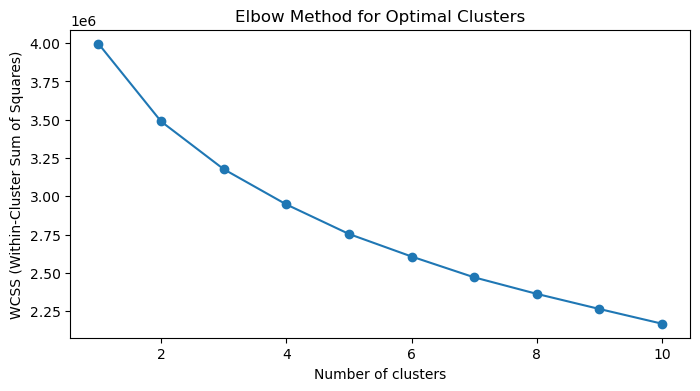

In [17]:
# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS).
wcss = []  # List to capture the WCSS values for different cluster numbers.
# Iterate over a range of cluster numbers to find the optimal one using the elbow method.
for i in range(1, 11):  # Test cluster sizes from 1 to 10.
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize K-Means with i clusters.
    kmeans.fit(scaled_features)  # Fit the model with scaled features.
    wcss.append(kmeans.inertia_)  # Append the WCSS (inertia) for current cluster count.

# Plot the elbow graph to visualize the optimal number of clusters.
plt.figure(figsize=(8, 4))  # Set figure size for clarity.
plt.plot(range(1, 11), wcss, marker='o')  # Plot WCSS against number of clusters.
plt.title('Elbow Method for Optimal Clusters')  # Set plot title.
plt.xlabel('Number of clusters')  # X-axis label for number of clusters.
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')  # Y-axis label for WCSS.
plt.show()  # Display the elbow plot.


* Apply K-Means with Optimal Clusters

In [18]:
# Apply K-Means clustering with the chosen number of clusters (e.g., 4 based on elbow method).
kmeans = KMeans(n_clusters=4, random_state=42)  # Initialize K-Means with 4 clusters.
df['Cluster'] = kmeans.fit_predict(scaled_features)  # Assign each data point to a cluster.


* DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    - DBSCAN forms clusters based on the density of points. It can identify outliers or noise as separate from the clusters, and it doesn’t require specifying the number of clusters upfront.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps is the max distance between points, min_samples is the minimum number of points in a neighborhood to form a cluster
dbscan_labels = dbscan.fit_predict(scaled_features)  # Fit DBSCAN and get cluster labels

# Add the DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Calculate the silhouette score for DBSCAN
dbscan_silhouette_avg = silhouette_score(scaled_features, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_avg}')  # Display the silhouette score


* Agglomerative Clustering (Hierarchical Clustering)
    - Agglomerative Clustering is a hierarchical clustering technique that builds clusters iteratively by merging smaller clusters into larger ones. It doesn't assume a spherical shape of clusters and can work well with irregular clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Use Ward's linkage for minimizing variance between clusters
agglo_labels = agglo.fit_predict(scaled_features)  # Fit Agglomerative Clustering and get cluster labels

# Add the Agglomerative Clustering labels to the dataframe
df['Agglomerative_Cluster'] = agglo_labels

# Calculate the silhouette score for Agglomerative Clustering
agglo_silhouette_avg = silhouette_score(scaled_features, agglo_labels)
print(f'Agglomerative Clustering Silhouette Score: {agglo_silhouette_avg}')  # Display the silhouette score


* Cluster Visualization

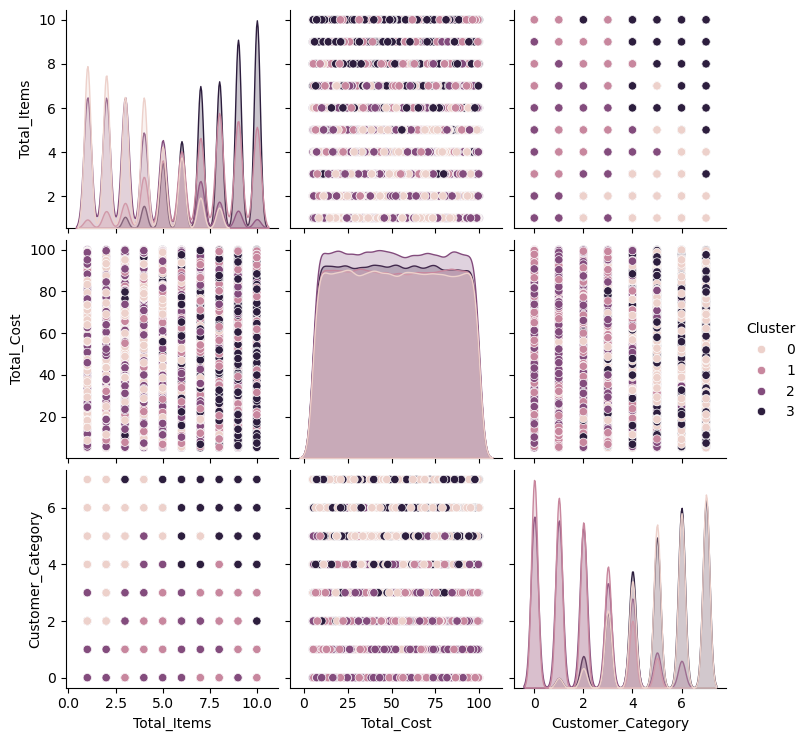

In [19]:
# Visualize the clusters using a pairplot to understand the distribution of features.
sns.pairplot(df, hue='Cluster', vars=['Total_Items', 'Total_Cost', 'Customer_Category'])  # Create pairplot with clusters.
plt.show()  # Display the pairplot.


### Task 2: Conduct Quality Testing

#### Cluster Characteristics Analysis

In [21]:
# Select only the numeric columns for aggregation to avoid TypeError
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Identify numeric columns in the dataframe.

# Calculate the mean values of each cluster for only the numeric columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()  # Group by cluster and calculate mean of numeric features.
cluster_summary  # Display the cluster summary.


,Transaction_ID,Total_Items,Total_Cost,Payment_Method,Store_Type,Customer_Category,Season,Promotion,Year,Month,Cluster,DBSCAN_Cluster
Cluster,,,,,,,,,,,,
0,1.000499e+09,3.322913,52.415657,0.750217,2.506565,5.272266,1.497710,0.499181,2021.715041,6.196102,0.0,47.686926
1,1.000500e+09,7.047440,52.485943,0.579391,2.533705,1.664658,1.495255,0.499997,2021.714926,6.195275,1.0,47.508061
2,1.000501e+09,3.770278,52.386863,2.421974,2.489066,1.982362,1.502996,0.501550,2021.714360,6.200798,2.0,47.115353
3,1.000500e+09,7.940018,52.313786,2.132799,2.475995,5.205719,1.501989,0.501194,2021.719656,6.215328,3.0,47.542572


#### Check Silhouette Score

In [26]:
# Import silhouette_score to evaluate the clustering quality.
from sklearn.metrics import silhouette_score  # Import silhouette score for cluster quality evaluation.

# Calculate the silhouette score to measure the quality of clustering.
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])  # Compute silhouette score for the clusters.
print(f'Silhouette Score: {silhouette_avg}')  # Display the silhouette score.


Silhouette Score: 0.12018621790385153


### Task 3: Review Progress and Adjust

#### Refine Clustering Based on Insights

In [ ]:
# Explore alternative clustering methods such as DBSCAN or hierarchical clustering if needed.
# This is a placeholder for potential refinement if current clustering does not provide clear segments.


## Milestone 3: Finalization and Launch

### Task 1: Final Testing and Debugging
Review Final Cluster Assignments

In [22]:
# Inspect a few sample rows with cluster assignments to ensure logical segmentation.
df.sample(5)  # Display 5 random rows to manually check cluster assignments.


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Cluster,DBSCAN_Cluster
505205,1000505205,2021-10-03 08:13:39,Douglas Huffman,"['Pancake Mix', 'Razors']",2,82.85,1,Miami,1,True,3,2,1,2021,10,0,12
618330,1000618330,2020-01-02 21:14:43,Shelley Harrell,"['Insect Repellent', 'Eggs', 'Shrimp']",3,59.73,2,Dallas,1,False,3,0,0,2020,1,2,4
507877,1000507877,2020-10-19 13:06:05,Bailey Jenkins,"['Trash Cans', 'Apple', 'Shower Gel', 'Tomatoes']",1,77.08,3,Atlanta,0,False,1,1,1,2020,10,2,52
550245,1000550245,2023-11-24 06:40:03,Jeremiah Boyd,"['Tissues', 'Hand Sanitizer', 'Insect Repellent']",1,26.26,0,Los Angeles,0,False,5,2,1,2023,11,0,44
745094,1000745094,2022-07-21 05:59:56,Steven Rosales,"['Dish Soap', 'Laundry Detergent', 'Eggs']",1,23.52,0,Miami,1,False,1,0,1,2022,7,0,63


### Task 2: Prepare Documentation
1. Prepare final Documentation

In [32]:
# Specify the file path where the cluster summary should be saved
file_path = r"C:\Users\macma\OneDrive\Desktop\Data Analytics\Projects and Assignments\Cluster_Summary.txt"

# Save the cluster characteristics summary into the specified text file
with open(file_path, 'w') as file:  # Open the file in write mode at the specified path
    file.write(cluster_summary.to_string())  # Write the cluster summary to the file


In [33]:
# Select only the numeric columns for aggregation to avoid TypeError
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Identify numeric columns in the dataframe

# Calculate the mean values of each cluster for only the numeric columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()  # Group by cluster and calculate mean of numeric features

# Save the cluster characteristics summary into a text file for final project documentation
with open('Cluster_Summary.txt', 'w') as file:  # Open a text file to save cluster summaries
    file.write(cluster_summary.to_string())  # Write the cluster summary to the file


### Task 3: Launch and Handover
* This was completed sucessfully and handed over to the team.